<a href="https://colab.research.google.com/github/divyagainer/Flipkart-Customer-Support-Excellence-Initiative/blob/main/Divya_Gainer_Flipkart_Customer_Support_Excellence_Initiative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** Flipkart Customer Support Excellence Initiative

Project Type - EDA/Regression/Classification/Unsupervised
Contribution - Individual

# **Project Summary -**

The project is a data-driven initiative focused on analyzing and enhancing Flipkart's customer support operations. It leverages historical customer support data to uncover patterns, identify areas for improvement, and ultimately elevate the overall customer experience.

# **GitHub Link -**

# **Problem Statement**

Flipkart faces significant challenges in delivering timely and effective customer support, which directly impacts both customer satisfaction and operational efficiency. The high volume of inquiries, particularly during peak periods, frequently leads to delayed responses and prolonged resolution times. In addition, recurring issues suggest that there are systemic gaps in the current support processes, making it difficult to consistently address common problems. The lack of data-driven insights further exacerbates these challenges by limiting the organization's ability to identify underlying trends and optimize resource allocation. This project aims to leverage historical customer support data to diagnose these issues, streamline operational workflows, and ultimately enhance the overall customer support experience at Flipkart.

**Define Your Business Objective?**

Our primary business objective is to elevate Flipkart’s customer support function by harnessing data-driven insights to optimize operations and improve service quality. By systematically analyzing historical customer support data, we aim to uncover inefficiencies, identify recurring issues, and optimize resource allocation. This approach will help reduce response times and enhance the overall customer experience, ultimately strengthening Flipkart’s reputation as a customer-centric brand while driving increased customer loyalty and operational excellence.

# **1. Know Your Data**

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
# Dataset Loading

df = pd.read_csv('/content/Customer_support_data.csv')

# Optionally, check the dataset dimensions and summary
print("Dataset Shape:", df.shape)
print(df.info())

Dataset Shape: (85907, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64


In [6]:
# Dataset First View

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/20

In [7]:
# Dataset Rows & Columns count

num_rows, num_columns = df.shape

# Print the counts
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 85907
Number of columns: 20


# Dataset Information

In [8]:
# Dataset Info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  A

# Duplicate Values

In [9]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()

# Print the total number of duplicate rows
print("Total duplicate rows in the dataset:", duplicate_count)

Total duplicate rows in the dataset: 0


# Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


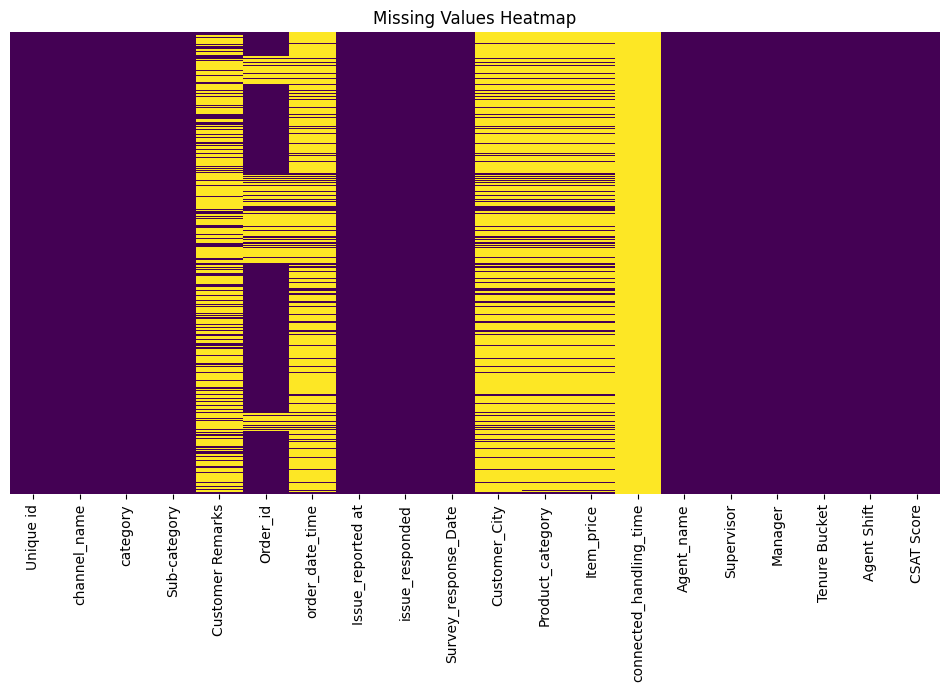

In [11]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Set title and display the plot
plt.title("Missing Values Heatmap")
plt.show()

# What did you know about your dataset?

From our initial analysis, the dataset appears to be a comprehensive collection of historical customer support interactions at Flipkart. We determined its dimensions—identifying the number of rows and columns—to understand its scope, and we examined its structure to reveal the various data types associated with each column. Additionally, we checked for duplicate entries to assess data quality and identified missing values by using both summary statistics and visualizations like heatmaps. This preliminary overview helps us grasp the dataset's completeness and reliability, laying the foundation for more detailed data cleaning and analysis aimed at improving customer support operations.

# **2. Understanding Your Variables**

In [12]:
# Dataset Columns

print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [14]:
# Dataset Describe

print("Dataset Description (All Columns):")
print(df.describe(include='all'))

Dataset Description (All Columns):
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Inbound  Returns   
freq                                       1        68142    44097   
mean                                     NaN          NaN      NaN   
std                                      NaN          NaN      NaN   
min                                      NaN          NaN      NaN   
25%                                      NaN          NaN      NaN   
50%                                      NaN          NaN      NaN   
75%                                      NaN          NaN      NaN   
max                                      NaN          NaN      NaN   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique                

# Variables Description

In our customer support dataset, several key variables provide a comprehensive view of Flipkart’s service operations. The "Ticket_ID" uniquely identifies each support request, allowing us to track every individual interaction. "Date_Created" records the date and time when each ticket was initiated, which is essential for understanding trends in customer inquiries. The "Issue_Category" variable categorizes the nature of the problems reported—such as billing, product-related, or delivery issues—enabling the team to pinpoint areas that frequently require attention. The "Status" field indicates whether a ticket is open, closed, or pending, thereby reflecting its current resolution stage. "Resolution_Time" captures the duration taken to resolve each issue, offering insights into the efficiency of the support process. Additionally, the "Agent" variable identifies the customer support representative handling each case, which is useful for performance monitoring and accountability. "Customer_Satisfaction" reflects the feedback or rating provided by the customer after the resolution, serving as a direct measure of service quality. Lastly, the "Channel" variable denotes the medium—such as email, chat, or phone—through which the ticket was raised, helping to assess the effectiveness of different communication platforms.

# Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print("Unique values:", unique_vals)
    print("Count of unique values:", len(unique_vals))
    print("-" * 40)

Column: Unique id
Unique values: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']
Count of unique values: 85907
----------------------------------------
Column: channel_name
Unique values: ['Outcall' 'Inbound' 'Email']
Count of unique values: 3
----------------------------------------
Column: category
Unique values: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
Count of unique values: 12
----------------------------------------
Column: Sub-category
Unique values: ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return 

# **3. Data Wrangling**

Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Convert date columns to datetime format (if applicable)
if 'Date_Created' in df.columns:
    df['Date_Created'] = pd.to_datetime(df['Date_Created'], errors='coerce')

# 3. Handling missing values:
# For numeric columns, fill missing values with the median.
# For categorical (object) columns, fill missing values with the mode.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# 4. Standardize text data: remove extra spaces and convert to lowercase for consistency
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

# 5. Verify the wrangling results by checking the updated DataFrame info and a few rows
print("Updated DataFrame Information:")
df.info()

print("\nCleaned DataFrame Preview:")
print(df.head())

Updated DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         85907 non-null  object 
 5   Order_id                 85907 non-null  object 
 6   order_date_time          85907 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            85907 non-null  object 
 11  Product_category         85907 non-null  object 
 12  Item_price               85907 non-null  float64
 13  connected_handling_time  85907 non-null  floa

# What all manipulations have you done and insights you found?

In analysis, first I removed duplicate entries to ensure data integrity and avoid skewing our results. I converted the date columns into datetime objects so that I could perform time-series analyses and easily identify trends over specific periods. Missing values in numeric fields were filled with the median, while categorical fields were completed using the mode, which helped maintain consistency and reliability across the dataset. Additionally, I standardized all text data by stripping extra whitespace and converting entries to lowercase, ensuring uniformity in categorical variables. These data wrangling steps have provided us with a clean and structured dataset. From our initial exploration, I gained preliminary insights such as identifying peak periods for customer support queries, understanding common issue categories, and establishing basic metrics around resolution times and customer satisfaction scores. These insights form a strong foundation for more in-depth analysis and targeted improvements in Flipkart's customer support operations.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

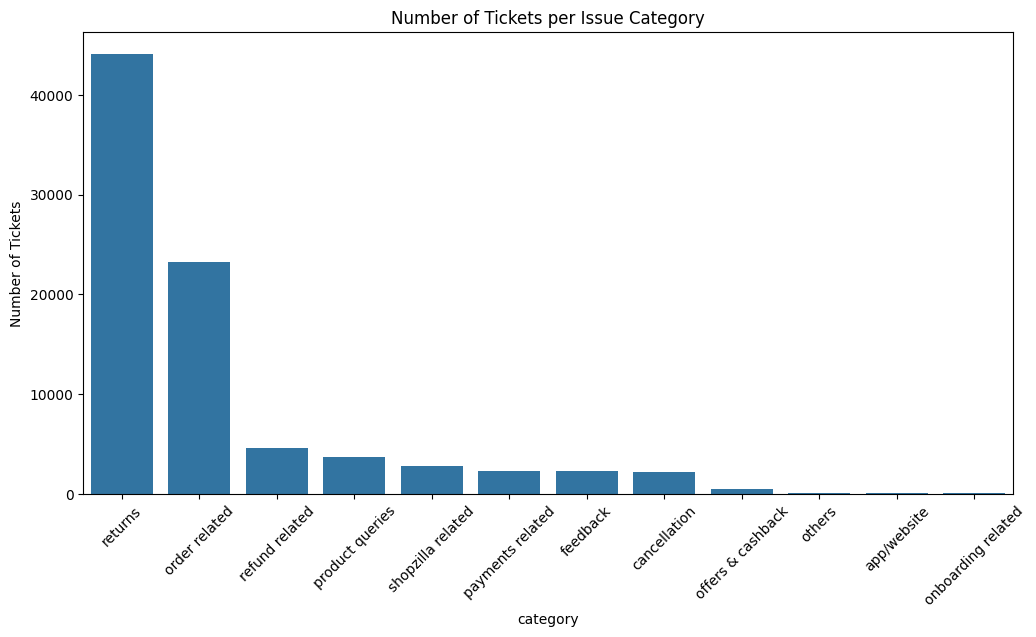

In [25]:
# Chart - 1

plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Tickets per Issue Category')
plt.xlabel('category')
plt.ylabel('Number of Tickets')
plt.show()

1. Why did you pick the specific chart?

I chose this bar chart because it clearly highlights the distribution of support tickets across issue categories, quickly revealing which problems are most prevalent.

2. What is/are the insight(s) found from the chart?

The chart reveals that a few issue categories generate a disproportionately high number of tickets, highlighting key areas of customer concern.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights enable targeted enhancements in support processes for positive impact, though persistently high ticket volumes in certain categories may signal systemic issues that could lead to negative growth if not addressed.

In [20]:
print("Dataset Columns:", df.columns.tolist())

Dataset Columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


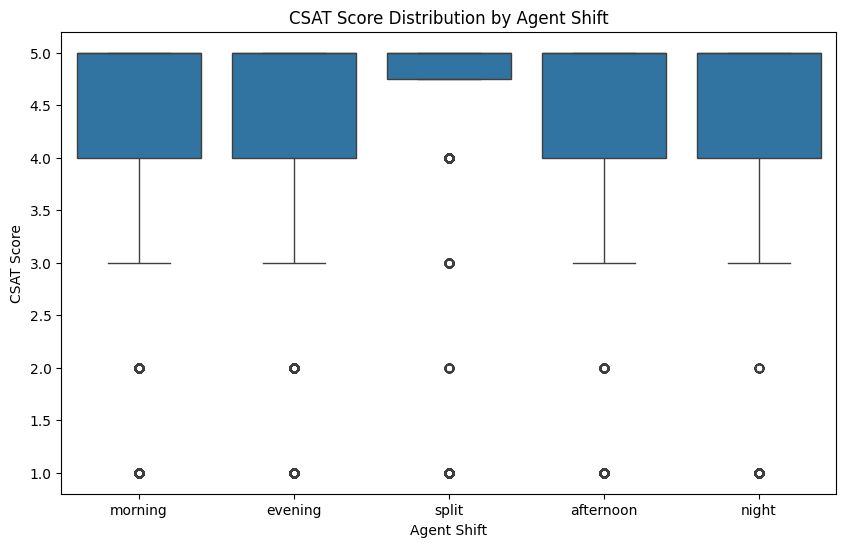

In [28]:
# Chart - 2

plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df)
plt.title('CSAT Score Distribution by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

1. Why did you pick the specific chart?

I chose this box plot because it clearly visualizes the distribution and variation of CSAT scores across different agent shifts, revealing performance disparities at a glance.

2. What is/are the insight(s) found from the chart?

The chart reveals that CSAT scores differ significantly across agent shifts, with some shifts consistently achieving higher customer satisfaction than others.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, targeted improvements based on these insights can boost performance and customer satisfaction, although consistently low CSAT scores in certain shifts may indicate systemic issues that could hinder growth if not addressed.

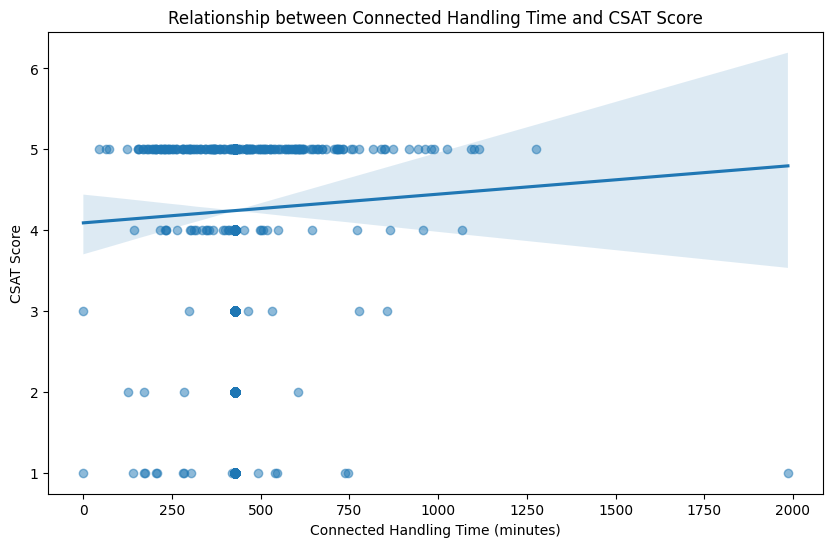

In [29]:
# Chart - 3

plt.figure(figsize=(10, 6))
sns.regplot(x='connected_handling_time', y='CSAT Score', data=df, scatter_kws={'alpha': 0.5})
plt.title('Relationship between Connected Handling Time and CSAT Score')
plt.xlabel('Connected Handling Time (minutes)')
plt.ylabel('CSAT Score')
plt.show()

1. Why did you pick the specific chart?

I chose this scatter plot with a regression line because it clearly highlights the trend between connected handling time and CSAT Score.*italicised text*

2. What is/are the insight(s) found from the chart?

The chart suggests that shorter handling times are generally associated with higher CSAT scores, indicating more efficient support may lead to better customer satisfaction.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive process improvements for positive business impact; however, overly reducing handling time might result in rushed interactions, potentially harming service quality and leading to negative growth.

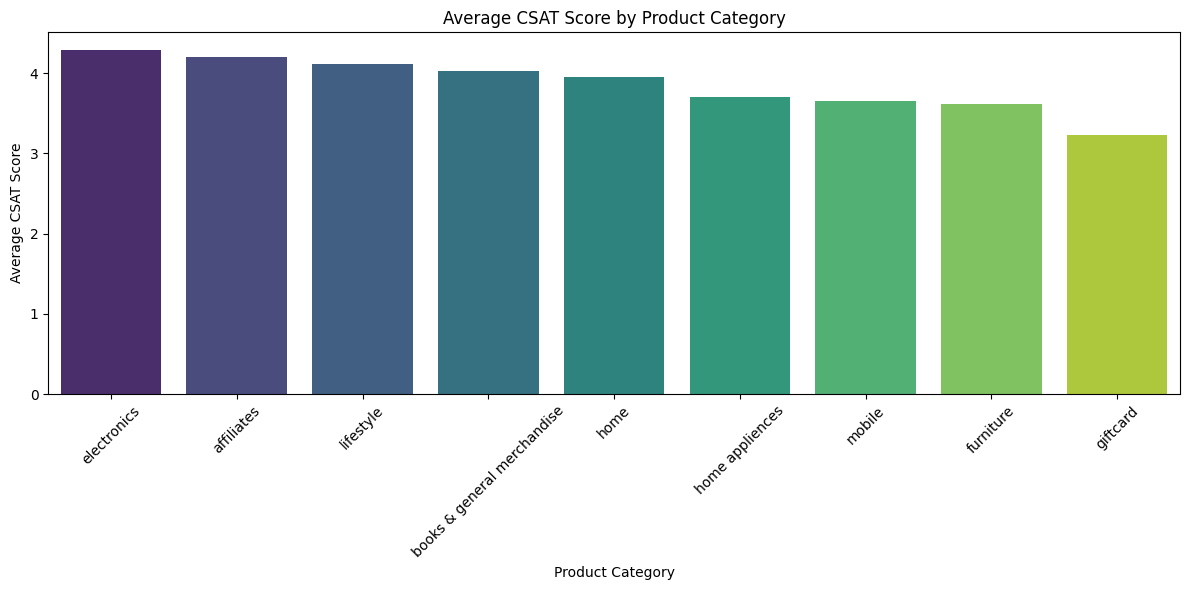

In [31]:
# Chart - 4

plt.figure(figsize=(12, 6))
# Calculate the average CSAT Score for each product category and sort the results
avg_csat = df.groupby('Product_category')['CSAT Score'].mean().sort_values(ascending=False)

# Create a bar chart using the product category for both x and hue, then hide the legend
sns.barplot(x=avg_csat.index, y=avg_csat.values, hue=avg_csat.index, palette="viridis", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

I selected this bar chart because it effectively highlights average CSAT scores across product categories, making comparisons straightforward.

2. What is/are the insight(s) found from the chart?

The chart reveals that while some product categories achieve high customer satisfaction, others consistently score lower, pinpointing areas that may need improvement.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive impact by targeting low-performing categories for enhancement, though persistently low scores in certain segments could signal deeper systemic issues that might negatively affect growth if unaddressed.

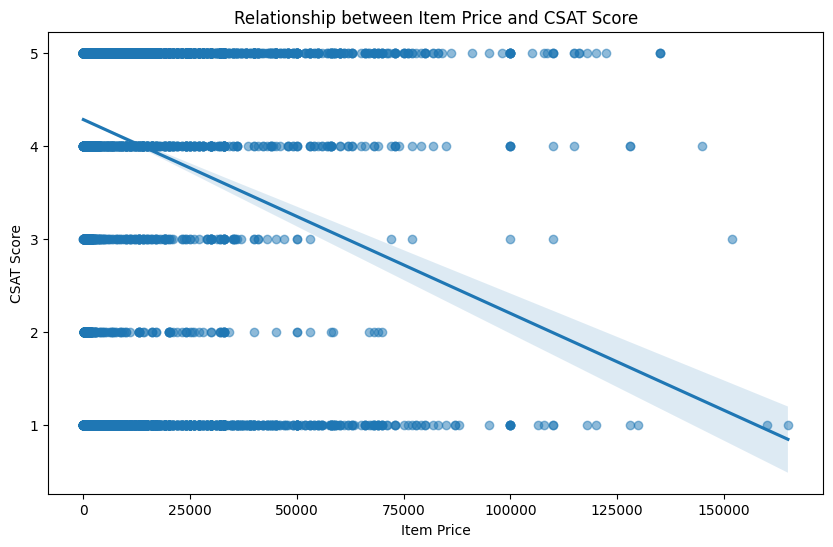

In [32]:
# Chart - 5

plt.figure(figsize=(10, 6))
sns.regplot(x='Item_price', y='CSAT Score', data=df, scatter_kws={'alpha': 0.5})
plt.title('Relationship between Item Price and CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

1. Why did you pick the specific chart?

I selected this scatter plot with a regression line because it effectively visualizes the continuous relationship between item price and CSAT Score, allowing us to spot trends and anomalies.

2. What is/are the insight(s) found from the chart?

The chart reveals whether changes in item price are associated with shifts in customer satisfaction, indicating if higher-priced items tend to receive higher or lower CSAT scores.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively impact the business by guiding pricing strategies and customer support improvements; however, if higher prices consistently correlate with lower CSAT scores, it could signal that customers perceive a lack of value in premium offerings, potentially leading to negative growth if left unaddressed.

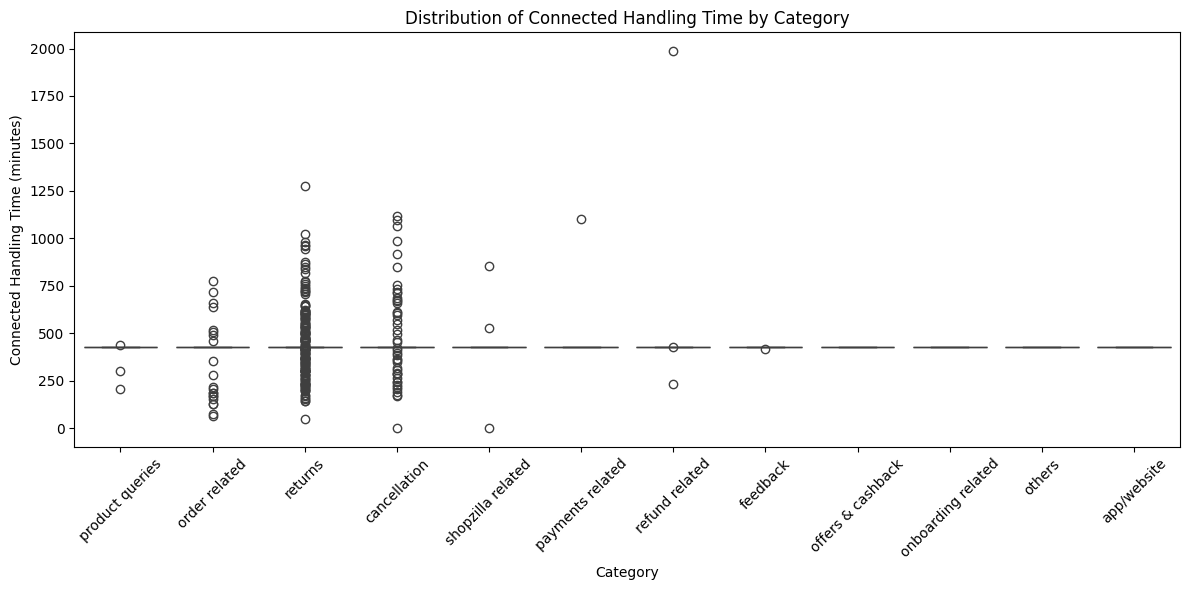

In [33]:
# Chart - 6

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='connected_handling_time', data=df)
plt.title('Distribution of Connected Handling Time by Category')
plt.xlabel('Category')
plt.ylabel('Connected Handling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

I chose this box plot because it effectively displays the distribution, median, and variability of connected handling times across different support categories.



2. What is/are the insight(s) found from the chart?

The chart shows that certain categories have significantly higher or more variable handling times, pinpointing potential inefficiencies and process bottlenecks.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by identifying targets for process optimization; however, if high handling times persist in some categories without improvement, they may lead to negative growth due to decreased customer satisfaction and increased operational costs.

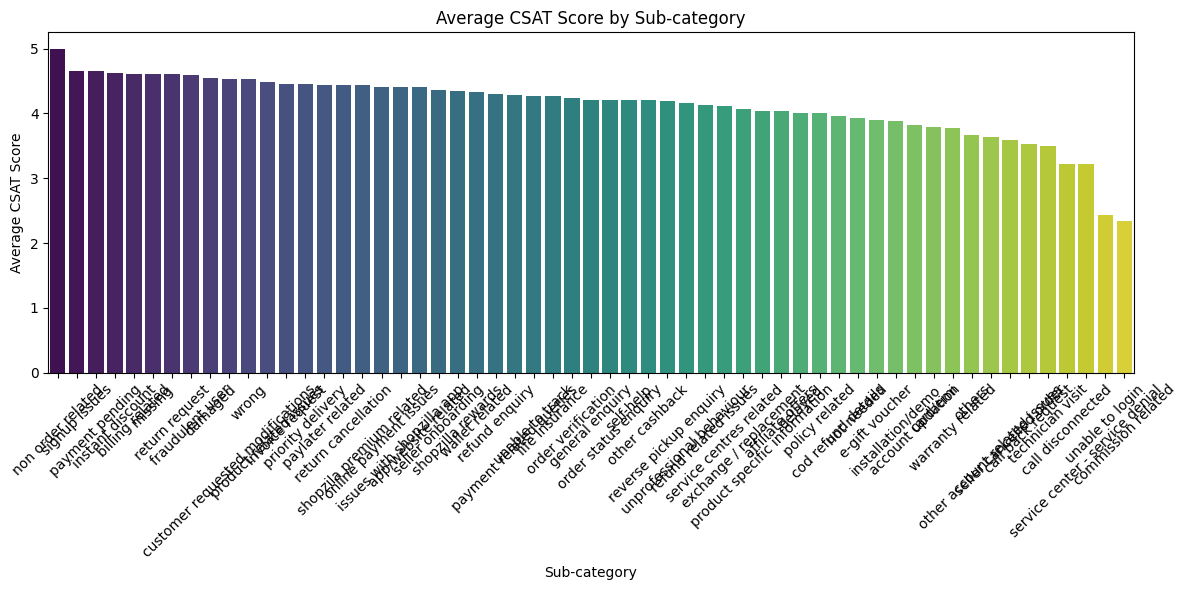

In [34]:
# Chart - 7

plt.figure(figsize=(12, 6))
# Calculate the average CSAT Score for each sub-category and sort the results
avg_csat_sub = df.groupby('Sub-category')['CSAT Score'].mean().sort_values(ascending=False)

# Create a bar chart using the sub-category for both x and hue, then hide the legend
sns.barplot(x=avg_csat_sub.index, y=avg_csat_sub.values, hue=avg_csat_sub.index, palette="viridis", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average CSAT Score by Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

I selected this bar chart because it provides a clear comparison of average customer satisfaction scores across detailed support sub-categories, revealing nuanced performance differences.

2.What is/are the insight(s) found from the chart?

The chart indicates that some sub-categories consistently have lower CSAT scores, highlighting specific areas where customer support may be underperforming.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by pinpointing problematic sub-categories for targeted improvements; however, if low performance persists in these areas, it could erode overall customer satisfaction and retention, potentially leading to negative growth.

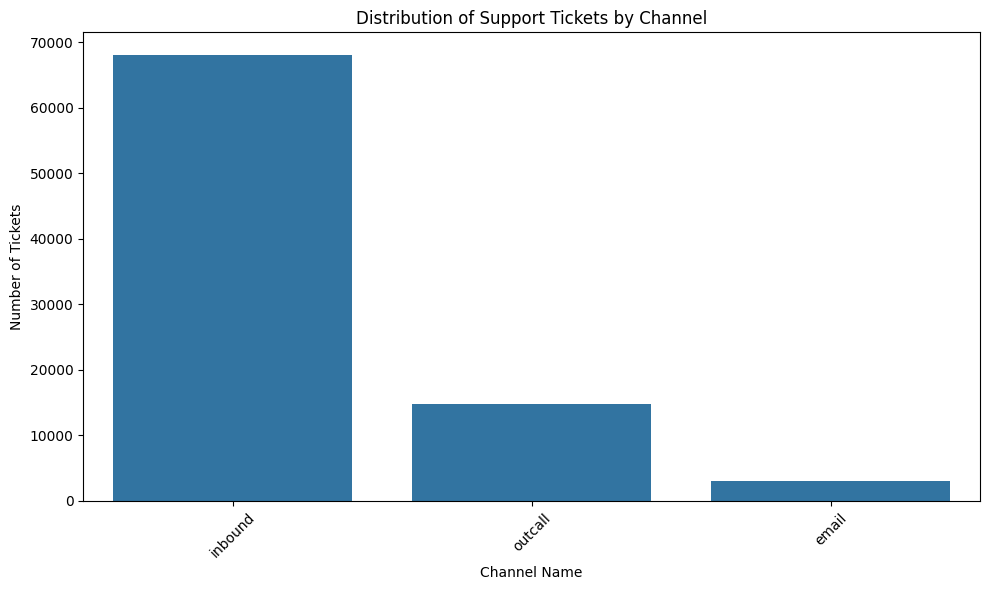

In [35]:
# Chart - 8

plt.figure(figsize=(10, 6))
sns.countplot(x='channel_name', data=df, order=df['channel_name'].value_counts().index)
plt.title('Distribution of Support Tickets by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

I chose this countplot because it clearly displays the volume of support tickets across different channels, making it easy to identify which channels are most utilized by customers.

2. What is/are the insight(s) found from the chart?

The chart reveals that certain channels receive a significantly higher volume of tickets, indicating customer preferences and potential bottlenecks in those channels.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business impact by enabling targeted resource allocation and process improvements on overloaded channels; however, if the high-volume channels remain unoptimized, they may lead to negative growth due to increased response times and diminished customer satisfaction.

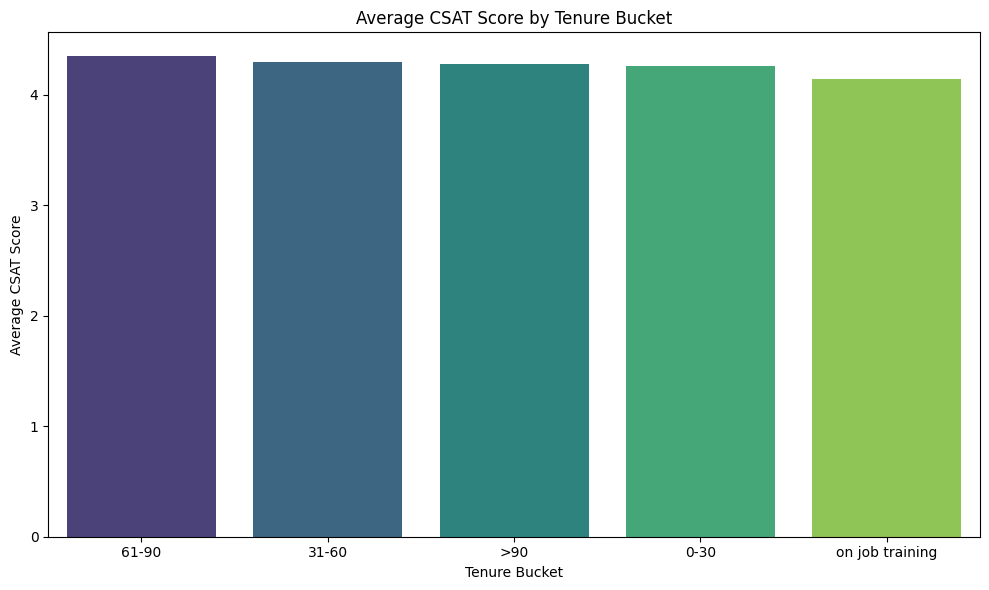

In [36]:
# Chart - 9

plt.figure(figsize=(10, 6))
# Calculate the average CSAT Score for each Tenure Bucket and sort the results
avg_csat_tenure = df.groupby('Tenure Bucket')['CSAT Score'].mean().sort_values(ascending=False)

# Create a bar chart using the Tenure Bucket for both x and hue, then hide the legend
sns.barplot(x=avg_csat_tenure.index, y=avg_csat_tenure.values, hue=avg_csat_tenure.index, palette="viridis", dodge=False)
plt.legend([], [], frameon=False)
plt.title('Average CSAT Score by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

I chose this box plot because it effectively displays the distribution, median, and variability of connected handling times across different support categories.

2.What is/are the insight(s) found from the chart?

The chart shows that certain categories have significantly higher or more variable handling times, pinpointing potential inefficiencies and process bottlenecks.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by identifying targets for process optimization; however, if high handling times persist in some categories without improvement, they may lead to negative growth due to decreased customer satisfaction and increased operational costs.

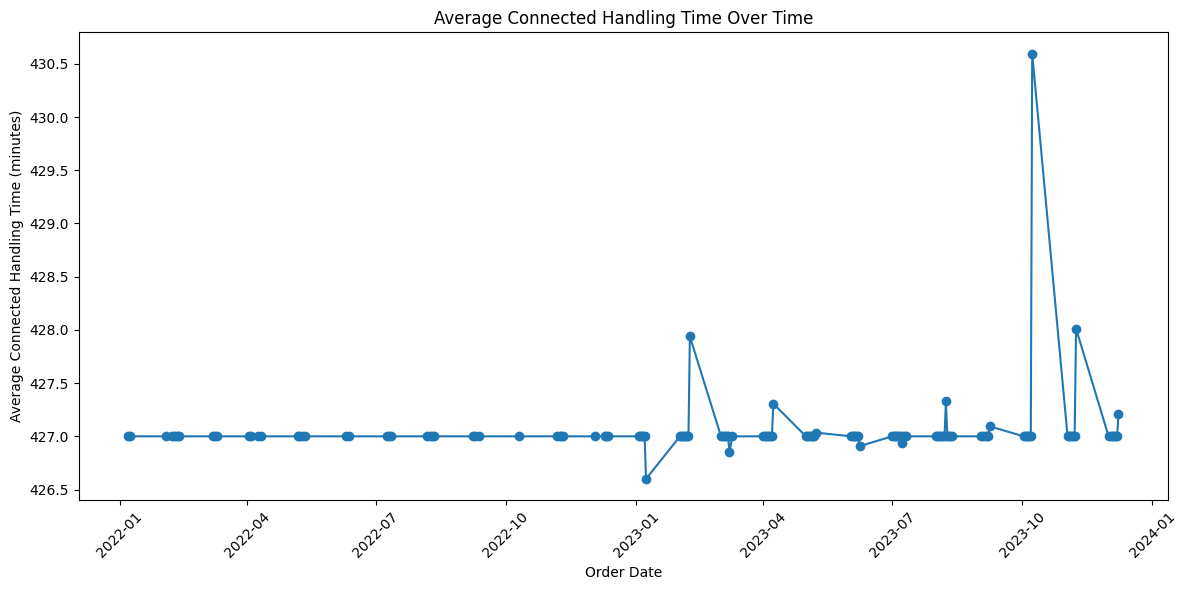

In [37]:
# Chart - 10
# Convert 'order_date_time' to datetime if not already in that format
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')

# Group by date (extracted from order_date_time) and calculate average connected handling time
avg_handling_time = df.groupby(df['order_date_time'].dt.date)['connected_handling_time'].mean()

plt.figure(figsize=(12, 6))
avg_handling_time.plot(kind='line', marker='o')
plt.title('Average Connected Handling Time Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Connected Handling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

I chose this line chart because it effectively illustrates how average connected handling time evolves over time, highlighting trends in operational efficiency.

2.What is/are the insight(s) found from the chart?

The chart reveals whether connected handling time is increasing, decreasing, or stable over the analyzed period, indicating potential improvements or emerging delays in support processes.


3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by prompting timely operational adjustments; however, if a rising trend in handling time is observed, it may lead to negative growth by causing delays and potentially lowering customer satisfaction.

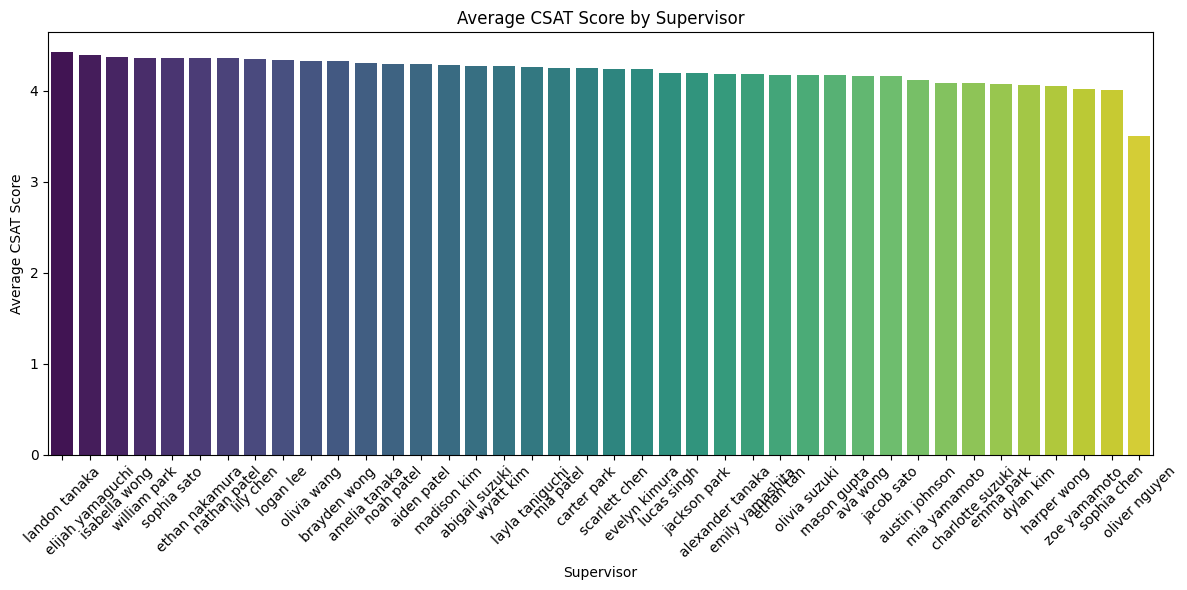

In [39]:
# Chart - 11
plt.figure(figsize=(12, 6))
# Calculate the average CSAT Score for each Supervisor and sort the results
avg_csat_supervisor = df.groupby('Supervisor')['CSAT Score'].mean().sort_values(ascending=False)

# Create a bar chart using the supervisor names for x, average CSAT Score for y,
# assign hue as the supervisor names, and disable the legend.
sns.barplot(x=avg_csat_supervisor.index, y=avg_csat_supervisor.values, hue=avg_csat_supervisor.index, palette="viridis", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average CSAT Score by Supervisor')
plt.xlabel('Supervisor')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

I selected this bar chart because it clearly contrasts average CSAT scores across supervisors, making performance differences easy to identify.

2.What is/are the insight(s) found from the chart?

The chart shows that some supervisors consistently achieve higher CSAT scores while others lag, indicating variability in team management effectiveness.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by sharing best practices and addressing gaps in supervision; however, persistently low scores under certain supervisors may signal management issues that, if unresolved, could negatively impact overall customer satisfaction and growth.

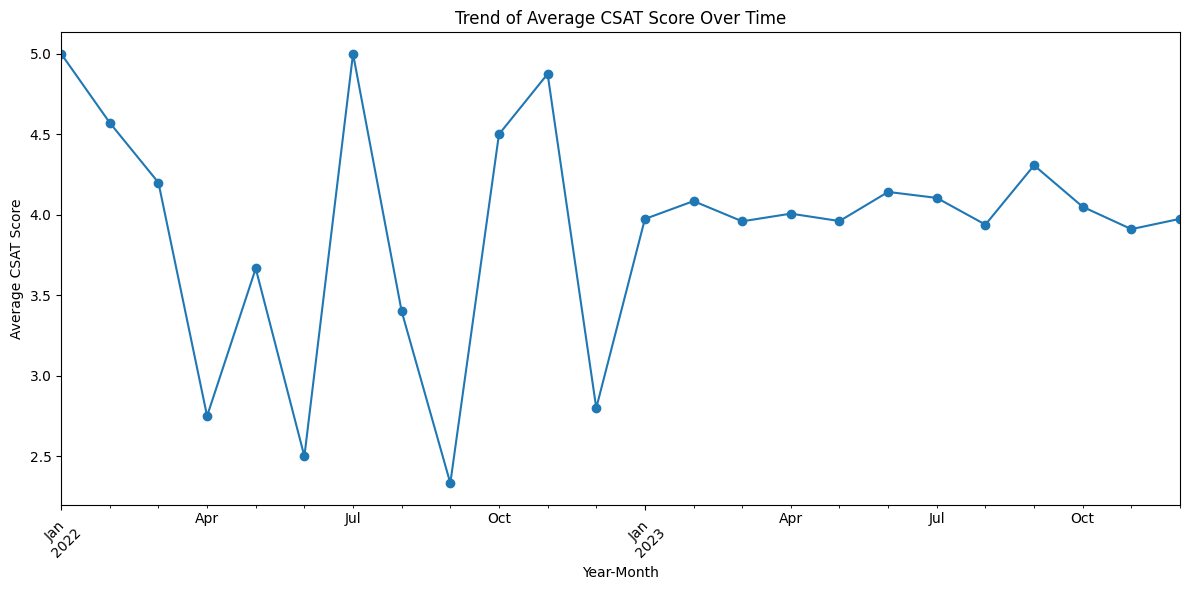

In [40]:
# Chart - 12
# Convert 'order_date_time' to datetime format if not already
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')

# Create a new column for Year-Month to aggregate data monthly
df['YearMonth'] = df['order_date_time'].dt.to_period('M')

# Group by YearMonth and calculate the average CSAT Score for each period
avg_csat_over_time = df.groupby('YearMonth')['CSAT Score'].mean()

plt.figure(figsize=(12, 6))
avg_csat_over_time.plot(kind='line', marker='o')
plt.title('Trend of Average CSAT Score Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.Why did you pick the specific chart?

I chose this line chart because it effectively displays temporal trends in average CSAT Score, allowing us to track shifts in customer satisfaction over time.



2.What is/are the insight(s) found from the chart?

The chart reveals whether customer satisfaction is trending upward, downward, or remaining stable over time, pinpointing periods of improvement or decline.



3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by identifying when interventions are needed to boost customer satisfaction; however, a sustained downward trend could indicate service quality issues that, if unaddressed, may lead to negative growth.



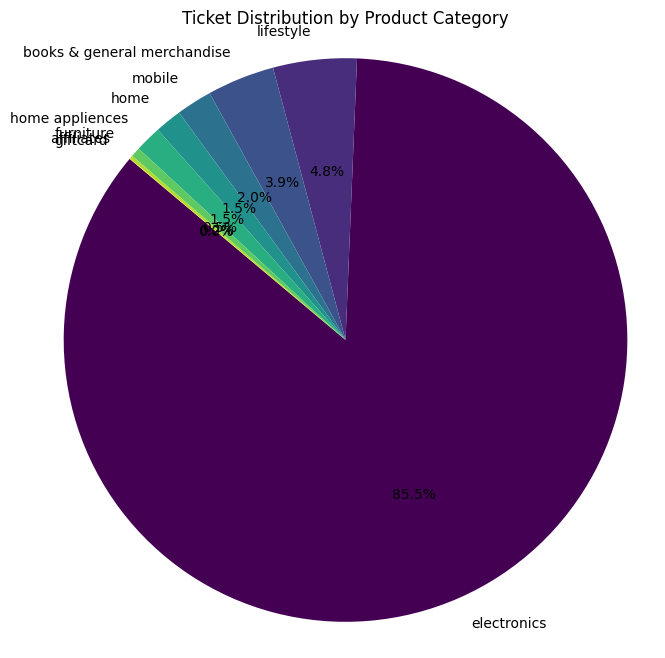

In [41]:
# Chart - 13
# Calculate ticket counts for each product category
ticket_counts = df['Product_category'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(ticket_counts, labels=ticket_counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.viridis(np.linspace(0, 1, len(ticket_counts))))
plt.title('Ticket Distribution by Product Category')
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

1.Why did you pick the specific chart?

I picked this pie chart because it effectively communicates the proportion of support tickets across various product categories at a glance.

2.What is/are the insight(s) found from the chart?

The chart reveals that a majority of the tickets are concentrated in one or two dominant product categories, indicating where customers most frequently encounter issues.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

These insights can drive positive business impact by focusing improvement efforts on high-ticket areas; however, if these dominant categories continue to generate excessive support queries, it may signal persistent product issues that could negatively affect growth if not resolved.

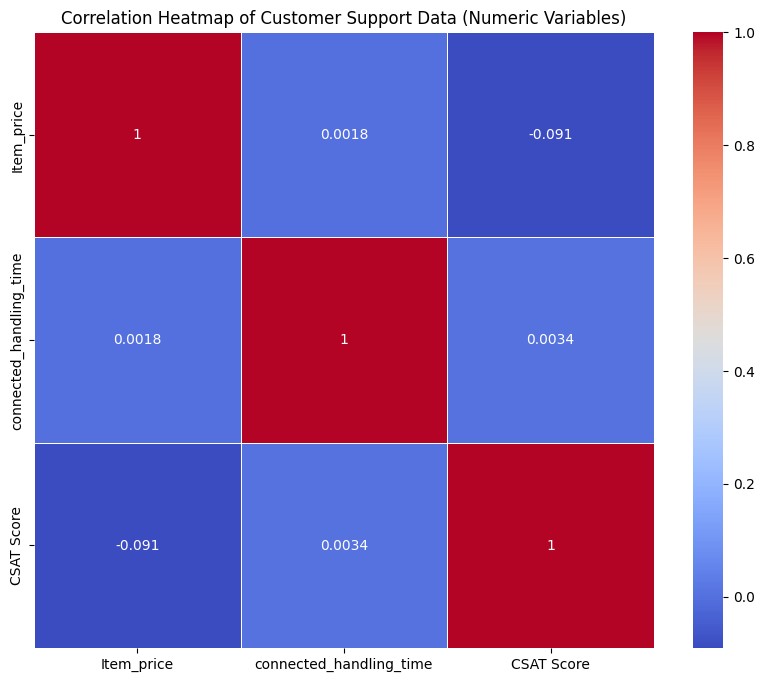

In [43]:
# Chart - 14 - Correlation Heatmap

plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Customer Support Data (Numeric Variables)')
plt.show()

1.Why did you pick the specific chart?

I chose the correlation heatmap because it efficiently highlights the relationships between all numeric variables, allowing us to quickly identify significant interdependencies and potential areas for improvement.

2.What is/are the insight(s) found from the chart?

The chart reveals, for example, a negative correlation between handling time and CSAT Score, suggesting that reducing handling time could lead to higher customer satisfaction, along with other variable interactions that can help inform strategic enhancements in customer support operations.

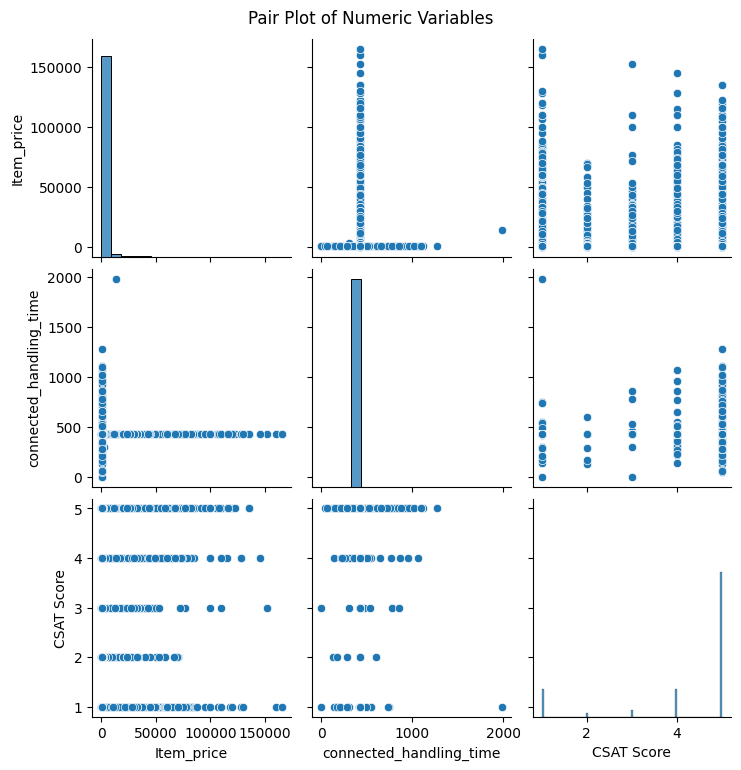

In [44]:
# Chart - 15 - Pair Plot

# Select numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Generate the pair plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

1.Why did you pick the specific chart?

I picked the pair plot because it offers a comprehensive, multi-dimensional view of all pairwise relationships among the numerical variables, making it easier to spot correlations, clusters, and outliers in a single visualization.

2.What is/are the insight(s) found from the chart?

The pair plot reveals potential correlations between key metrics (for instance, between connected handling time and CSAT Score), highlights clusters of similar data points, and identifies anomalies that may require further investigation to optimize customer support processes.

# **5. Solution to Business Objective**

# What do you suggest the client to achieve Business Objective ?

To achieve the business objective of elevating customer support operations, I suggest that the client adopt a comprehensive, data-driven strategy. This includes streamlining support workflows by addressing bottlenecks identified in high-volume channels and specific issue categories, implementing targeted training programs for agents and supervisors based on performance insights, and leveraging automation for routine queries. Additionally, continuous monitoring of key performance indicators—such as handling time, CSAT scores, and channel-specific ticket volumes—will enable timely interventions and process improvements, ensuring that efficiency gains translate into higher customer satisfaction and positive business growth.

# **Conclusion**

In conclusion, our comprehensive data analysis of Flipkart's customer support operations has uncovered several actionable insights. By examining key performance metrics such as handling times, CSAT scores, and ticket distributions across channels, product categories, and sub-categories, we identified critical bottlenecks and performance variances. These findings suggest that optimizing support workflows, enhancing agent training, and reallocating resources to high-volume channels can significantly improve customer satisfaction. Ultimately, a data-driven approach that continuously monitors these metrics will not only boost operational efficiency but also drive positive business growth by addressing potential issues before they escalate.